# Show Data

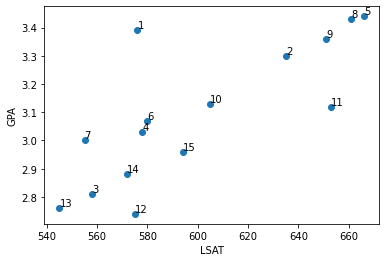

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
# add a column for observation
data.insert(loc=0, column="observation", value=range(1, len(data)+1))

# plot the scatter plot with observation labels
plt.scatter(x=data['LSAT'], y=data['GPA'])
for i in range(len(data)):
    plt.text(data['LSAT'][i], data['GPA'][i], data['observation'][i], ha='left', va='bottom')

plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.show()

# Nonparametric bootstrap

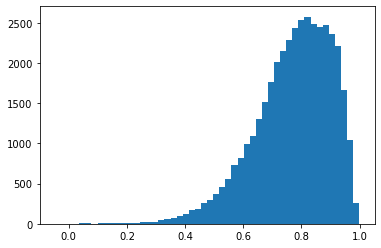

Seconds it took to run=  2.191542387008667


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import time

time1 = time.time()
# Load data
data = pd.read_csv('data.csv')

# Extract LSAT and GPA columns
lsat = data['LSAT'].values
gpa = data['GPA'].values

# Compute observed correlation coefficient
obs_corr, _ = pearsonr(lsat, gpa)

# Set number of bootstrap samples
n_boot = 40000

# Initialize array to store bootstrap statistics
corr_boot = np.zeros(n_boot)

# Loop over bootstrap samples
for i in range(n_boot):
    # Generate random indices with replacement
    idx = np.random.choice(len(lsat), size=len(lsat), replace=True)

    # Create bootstrap sample using random indices
    bootstrap_lsat = lsat[idx]
    bootstrap_gpa = gpa[idx]

    # Compute correlation coefficient between LSAT and GPA for bootstrap sample
    corr_boot[i], _ = pearsonr(bootstrap_lsat, bootstrap_gpa)

plt.hist(corr_boot, bins=50)
plt.show()
time2 = time.time()
print("Seconds it took to run= ", time2-time1)

# Complete enumeration bootstrap

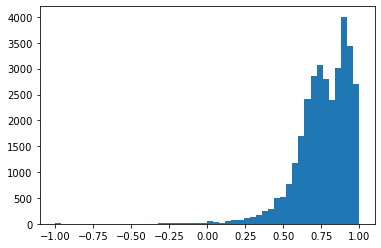

Seconds it took to run=  1.7676053047180176


In [18]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import time
time1 = time.time()

data = pd.read_csv('data.csv')
lsat = data['LSAT'].values
gpa = data['GPA'].values

# Compute observed correlation coefficient
obs_corr, _ = pearsonr(lsat, gpa)

# Set number of bootstrap samples
n_boot = 2**len(lsat)

# Initialize array to store bootstrap statistics
corr_boot = np.zeros(n_boot)

# Loop over all possible bootstrap samples
for i in range(n_boot):
    # Convert i to binary and zero-pad to length of lsat
    binary_i = np.binary_repr(i, width=len(lsat))

    # Create bootstrap sample using binary index
    bootstrap_lsat = lsat[np.array(list(binary_i)).astype(bool)]
    bootstrap_gpa = gpa[np.array(list(binary_i)).astype(bool)]

    # Check if bootstrap sample has length less than 2
    if len(bootstrap_lsat) < 2 or len(bootstrap_gpa) < 2:
        continue

    # Compute correlation coefficient between LSAT and GPA for bootstrap sample
    corr_boot[i], _ = pearsonr(bootstrap_lsat, bootstrap_gpa)

plt.hist(corr_boot, bins=50)
plt.show()
time2 = time.time()
print("Seconds it took to run= ", time2-time1)

# Gray Codes: Nonparametric Bootstrap

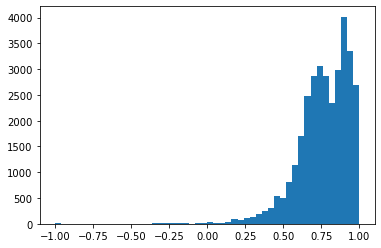

Seconds it took to run=  1.8019225597381592


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import time

time1 = time.time()

# Load data
data = pd.read_csv('data.csv')

# Extract LSAT and GPA columns
lsat = data['LSAT'].values
gpa = data['GPA'].values

# Compute observed correlation coefficient
obs_corr, _ = pearsonr(lsat, gpa)

# Set number of bootstrap samples
n_lsat = len(lsat)
n_boot = 2**n_lsat

# Initialize array to store bootstrap statistics
corr_boot = np.zeros(n_boot)

# Generate Gray codes for compositions
gray_codes = np.arange(n_boot) ^ np.arange(n_boot) // 2

# Loop over Gray codes for compositions
for i in gray_codes:
    # Convert i to binary and zero-pad to length of lsat
    binary_i = np.binary_repr(i, width=n_lsat)

    # Create bootstrap sample using binary index
    bootstrap_lsat = lsat[np.array(list(binary_i)).astype(bool)]
    bootstrap_gpa = gpa[np.array(list(binary_i)).astype(bool)]

    # Check if bootstrap sample has length less than 2
    if len(bootstrap_lsat) < 2 or len(bootstrap_gpa) < 2:
        continue

    # Compute correlation coefficient between LSAT and GPA for bootstrap sample
    corr_boot[i], _ = pearsonr(bootstrap_lsat, bootstrap_gpa)

# Keep only the valid compositions
corr_boot = corr_boot[corr_boot != 0]

# Sample n_boot compositions from the valid compositions
corr_boot = np.random.choice(corr_boot, size=n_boot, replace=True)

plt.hist(corr_boot, bins=50)
plt.show()

time2 = time.time()
print("Seconds it took to run= ", time2-time1)

# Gray Codes: Complete Enumeration Bootstrap

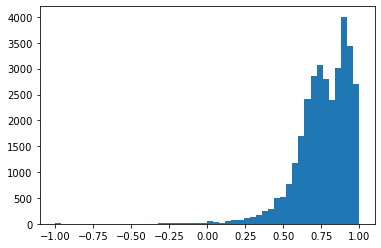

In [20]:
from itertools import product
import time
time1 = time.time()

data = pd.read_csv('data.csv')
lsat = data['LSAT'].values
gpa = data['GPA'].values

# Generate Gray codes
gray_codes = []
for i in range(len(lsat)):
    gray_codes.append(['0']*i + ['1'] + ['0']*(len(lsat)-i-1))
    gray_codes.append(['1']*i + ['0'] + ['1']*(len(lsat)-i-1))

# Set number of bootstrap samples
n_boot = 2**len(lsat)

# Initialize array to store bootstrap statistics
corr_boot = np.zeros(2**len(lsat))

# Loop over all possible bootstrap samples
for i in range(n_boot):
    # Convert i to binary and zero-pad to length of lsat
    binary_i = np.binary_repr(i, width=len(lsat))

    # Pad binary index with leading zeros to match length of lsat and gpa
    binary_i = '0' * (len(lsat) - len(binary_i)) + binary_i

    # Create bootstrap sample using binary index
    bootstrap_lsat = lsat[np.array(list(binary_i)).astype(bool)]
    bootstrap_gpa = gpa[np.array(list(binary_i)).astype(bool)]

    # Check if bootstrap sample has length less than 2
    if len(bootstrap_lsat) < 2 or len(bootstrap_gpa) < 2:
        continue

    # Compute correlation coefficient between LSAT and GPA for bootstrap sample
    corr_boot[i], _ = pearsonr(bootstrap_lsat, bootstrap_gpa)
plt.hist(corr_boot, bins=50)
plt.show()


# Potential Speedup Gray Codes

For our case in the Complete Enumeration bootstrap, we can use gray codes for a potential speedup. When using Gray Codes for compositions, we have a dataset with 15 points for 2 columns. 
As there are 2 input variables that both have 15 different values, we can calculate that there are 225 different combinations. This can be expressed in 8 bits. Using normal binary counting you need to flip 446 bits to count from 0 to 244. For gray code this is only 225 flips. Meaning that that for going through all the different combinations gray codes perform about 49.6% less operations making it about that much faster.

In our own code, there isn't a speedup for Gray Codes. We save all gray codes in a python list object. This is a very inefficient method of implementing Gray codes, since this doesn't utilize the advantages of the gray codes.

# Monte Carlo Bootstrap

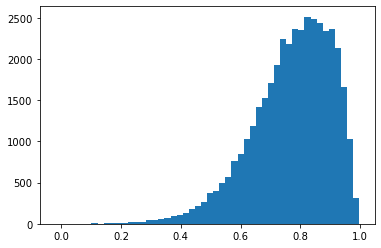

In [21]:
data = pd.read_csv('data.csv')

# Extract LSAT and GPA columns
lsat = data['LSAT']
gpa = data['GPA']

def Monte_Carlo(lsat, gpa):
    # Compute observed correlation coefficient
    obs_corr, _ = pearsonr(lsat, gpa)

    # Set number of Monte Carlo simulations
    n_sims = 40000

    # Initialize array to store bootstrap statistics
    corr_sims = np.zeros(n_sims)

    # Loop over simulations
    for i in range(n_sims):
        # Generate random sample of size n with replacement
        sample = np.random.choice(data.index, size=len(data), replace=True)
        # Compute correlation coefficient between LSAT and GPA for the bootstrap sample
        corr_sims[i], _ = pearsonr(lsat.iloc[sample], gpa.iloc[sample])
    return corr_sims

corr_sims = Monte_Carlo(lsat, gpa)


# Plot the histogram of the bootstrap statistics
plt.hist(corr_sims, bins=50)
plt.show()

# Removing Outliers

To find outliers we will be using the cook's distance. 

Cook's distance is a measure that identifies influential data points in regression analysis. It measures how much the regression coefficients would change if a data point is excluded, relative to the other data points in the model. A large Cook's distance indicates that the data point has a substantial impact on the model and may be an outlier or influential observation.


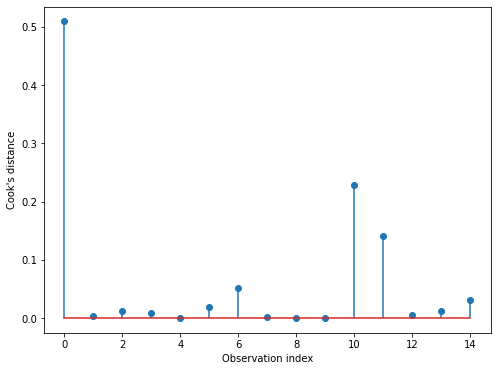

In [22]:
from statsmodels.regression.linear_model import OLS

# Load data
data = pd.read_csv("data.csv")

# Fit linear regression model
X = data['LSAT']
y = data['GPA']
model = OLS(y, X).fit()

# Calculate Cook's distance
influence = model.get_influence()
cook_distance, _ = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(8, 6))
plt.stem(cook_distance)
plt.xlabel("Observation index")
plt.ylabel("Cook's distance")
plt.show()

Here we remove the outliers according to the cook's distance

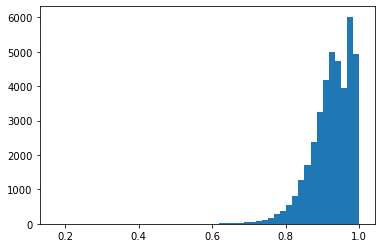

In [30]:
data = pd.read_csv('data.csv')
data = data.drop([0, 6, 9, 11])
# reset index to ensure that it is continuous
data = data.reset_index(drop=True)

# Extract LSAT and GPA columns
lsat = data['LSAT']
gpa = data['GPA']

def Monte_Carlo(lsat, gpa):
    # Compute observed correlation coefficient
    obs_corr, _ = pearsonr(lsat, gpa)

    # Set number of Monte Carlo simulations
    n_sims = 40000

    # Initialize array to store bootstrap statistics
    corr_sims = np.zeros(n_sims)

    # Loop over simulations
    for i in range(n_sims):
        # Generate random sample of size n with replacement
        sample = np.random.choice(data.index, size=len(data), replace=True)
        # Compute correlation coefficient between LSAT and GPA for the bootstrap sample
        corr_sims[i], _ = pearsonr(lsat.iloc[sample], gpa.iloc[sample])
    return corr_sims

corr_sims = Monte_Carlo(lsat, gpa)


# Plot the histogram of the bootstrap statistics
plt.hist(corr_sims, bins=50)
plt.show()

# Why there is a difference

The Monte Carlo bootstrap and complete enumeration bootstrap are two different resampling methods that can be used to estimate the distribution of a statistic from a sample.

The Monte Carlo bootstrap uses random sampling with replacement to generate a large number of bootstrap samples, whereas the complete enumeration bootstrap generates all possible bootstrap samples.

Reason One: The Monte Carlo bootstrap uses random sampling, so there is always some degree of randomness in the generated bootstrap samples, whereas the complete enumeration bootstrap generates all possible samples, which may be more representative of the true population. 
Reason Two: The Monte Carlo bootstrap only generates a finite number of bootstrap samples, whereas the complete enumeration bootstrap generates all possible samples, so the latter method may be more accurate in estimating the true distribution of the statistic.

We believe it is most likely due to complete enumeration bootstrap generating all possible samples, creating a more representative bootstrap of the data. In the data itself we see a few variables that have a higher 

# References

[1]: Cook, R.D. (2011). Cook’s Distance. In: Lovric, M. (eds) International Encyclopedia of Statistical Science. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-642-04898-2_189

[2]: Paul Klingsberg, A Gray code for compositions, Journal of Algorithms,Volume 3, Issue 1, 1982, Pages 41-44, ISSN 0196-6774, https://doi.org/10.1016/0196-6774(82)90006-2.


